## 01 - Data Exploration (Understanding Data)

Read raw data tables saved as csv format  
Perform exploratory analysis to understand the data  
Perform simple Machine Learning algorithm for weather prediction  
The data used id provided within the folder if this note book  

In [1]:
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [2]:
#Read CSV Data File
df = pd.read_csv("weather.csv")
df

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,8.0,24.3,0.0,3.4,6.3,NW,30.0,SW,NW,6.0,...,29,1019.7,1015.0,7,7,14.4,23.6,No,3.6,Yes
1,14.0,26.9,3.6,4.4,9.7,ENE,39.0,E,W,4.0,...,36,1012.4,1008.4,5,3,17.5,25.7,Yes,3.6,Yes
2,13.7,23.4,3.6,5.8,3.3,NW,85.0,N,NNE,6.0,...,69,1009.5,1007.2,8,7,15.4,20.2,Yes,39.8,Yes
3,13.3,15.5,39.8,7.2,9.1,NW,54.0,WNW,W,30.0,...,56,1005.5,1007.0,2,7,13.5,14.1,Yes,2.8,Yes
4,7.6,16.1,2.8,5.6,10.6,SSE,50.0,SSE,ESE,20.0,...,49,1018.3,1018.5,7,7,11.1,15.4,Yes,0.0,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
361,9.0,30.7,0.0,7.6,12.1,NNW,76.0,SSE,NW,7.0,...,15,1016.1,1010.8,1,3,20.4,30.0,No,0.0,No
362,7.1,28.4,0.0,11.6,12.7,N,48.0,NNW,NNW,2.0,...,22,1020.0,1016.9,0,1,17.2,28.2,No,0.0,No
363,12.5,19.9,0.0,8.4,5.3,ESE,43.0,ENE,ENE,11.0,...,47,1024.0,1022.8,3,2,14.5,18.3,No,0.0,No
364,12.5,26.9,0.0,5.0,7.1,NW,46.0,SSW,WNW,6.0,...,39,1021.0,1016.2,6,7,15.8,25.9,No,0.0,No


In [ ]:
# View dataframe column/ row information, size and data types 
# df.head()
# df.tail()
df.shape
# df.index
df.columns
# df.dtypes

In [28]:
df['Rainfall'].unique() # Display non duplicate values (unique) #type:ignore
df.nunique() # Display a total of unique values
# df['Evaporation'].value_counts()
# df.count # Display a total of not null values
# df.isna().sum() # Check null values
# df.info()

MinTemp          180
MaxTemp          187
Rainfall          47
Evaporation       55
Sunshine         114
WindGustDir       16
WindGustSpeed     35
WindDir9am        16
WindDir3pm        16
WindSpeed9am      22
WindSpeed3pm      26
Humidity9am       60
Humidity3pm       74
Pressure9am      190
Pressure3pm      193
Cloud9am           9
Cloud3pm           9
Temp9am          178
Temp3pm          200
RainToday          2
RISK_MM           47
RainTomorrow       2
dtype: int64

In [8]:
df.describe() # Calculate mean, std, variance etc


,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RISK_MM
count,366.000000,366.000000,366.000000,366.000000,363.000000,364.000000,359.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000
mean,7.265574,20.550273,1.428415,4.521858,7.909366,39.840659,9.651811,17.986339,72.035519,44.519126,1019.709016,1016.810383,3.890710,4.024590,12.358470,19.230874,1.428415
std,6.025800,6.690516,4.225800,2.669383,3.481517,13.059807,7.951929,8.856997,13.137058,16.850947,6.686212,6.469422,2.956131,2.666268,5.630832,6.640346,4.225800
min,-5.300000,7.600000,0.000000,0.200000,0.000000,13.000000,0.000000,0.000000,36.000000,13.000000,996.500000,996.800000,0.000000,0.000000,0.100000,5.100000,0.000000
25%,2.300000,15.025000,0.000000,2.200000,5.950000,31.000000,6.000000,11.000000,64.000000,32.250000,1015.350000,1012.800000,1.000000,1.000000,7.625000,14.150000,0.000000
50%,7.450000,19.650000,0.000000,4.200000,8.600000,39.000000,7.000000,17.000000,72.000000,43.000000,1020.150000,1017.400000,3.500000,4.000000,12.550000,18.550000,0.000000
75%,12.500000,25.500000,0.200000,6.400000,10.500000,46.000000,13.000000,24.000000,81.000000,55.000000,1024.475000,1021.475000,7.000000,7.000000,17.000000,24.000000,0.200000
max,20.900000,35.800000,39.800000,13.800000,13.600000,98.000000,41.000000,52.000000,99.000000,96.000000,1035.700000,1033.200000,8.000000,8.000000,24.700000,34.500000,39.800000


In [ ]:
# Rename a column
df.rename (columns = {'Wind Gust Speed' : 'WindGustSpeed'}, inplace = True)
df.columns

In [ ]:
df.dtypes
df.duplicated().sum() # Check duplicates
# df1 = df.drop(["WindGustDir", "RainToday", "RainTomorrow"], axis = 1) # Delete columns
df1 = df.drop(columns = ["WindGustDir", "RainToday", "RainTomorrow"], inplace = True) # Delete columns
df1.dtypes
df.shape
# del(df1)
# df1

In [ ]:
# Select multiple columns by conditions
df[(df['WindGustSpeed'] < 20)  & (df['Rainfall'] > 0.1)]


In [15]:
# Select columns containing numerical data
numerical_columns = df.select_dtypes(include='number')
numerical_columns.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RISK_MM
count,366.000000,366.000000,366.000000,366.000000,363.000000,364.000000,359.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000
mean,7.265574,20.550273,1.428415,4.521858,7.909366,39.840659,9.651811,17.986339,72.035519,44.519126,1019.709016,1016.810383,3.890710,4.024590,12.358470,19.230874,1.428415
std,6.025800,6.690516,4.225800,2.669383,3.481517,13.059807,7.951929,8.856997,13.137058,16.850947,6.686212,6.469422,2.956131,2.666268,5.630832,6.640346,4.225800
min,-5.300000,7.600000,0.000000,0.200000,0.000000,13.000000,0.000000,0.000000,36.000000,13.000000,996.500000,996.800000,0.000000,0.000000,0.100000,5.100000,0.000000
25%,2.300000,15.025000,0.000000,2.200000,5.950000,31.000000,6.000000,11.000000,64.000000,32.250000,1015.350000,1012.800000,1.000000,1.000000,7.625000,14.150000,0.000000
50%,7.450000,19.650000,0.000000,4.200000,8.600000,39.000000,7.000000,17.000000,72.000000,43.000000,1020.150000,1017.400000,3.500000,4.000000,12.550000,18.550000,0.000000
75%,12.500000,25.500000,0.200000,6.400000,10.500000,46.000000,13.000000,24.000000,81.000000,55.000000,1024.475000,1021.475000,7.000000,7.000000,17.000000,24.000000,0.200000
max,20.900000,35.800000,39.800000,13.800000,13.600000,98.000000,41.000000,52.000000,99.000000,96.000000,1035.700000,1033.200000,8.000000,8.000000,24.700000,34.500000,39.800000


In [ ]:
# Create box plots for each numerical column
# This helps us explore the distribution of values and to remove outliers
for column in numerical_columns:
    plt.figure(figsize = (6, 6))
    sns.boxplot(data = df[column])
    plt.title(f'Box Plot - {column}')
    plt.show()

In [ ]:
# Removing outliers
q1, q2, q3 = np.percentile(numerical_columns["Evaporation"], [4, 8, 12])
iqr = q3 - q1
lower_extreme = q1 - 1.5 * iqr
upper_extreme = q3 + 1.5 * iqr
num1 = numerical_columns.loc[(df["Evaporation"] >= lower_extreme) & (df["Evaporation"] <= upper_extreme)]
num1


In [ ]:
num1.reset_index(drop = True, inplace = True)
num1

## 02 - Exploratory Data Analysis

In [ ]:
# Get names of all columns with data type 'object' ( cateforical columns)
cat_vars = df.select_dtypes(include = 'object').columns.tolist()

# Create a figure with subplots
num_cols = len(cat_vars)
num_rows = (num_cols + 2) //3
fig, axs = plt.subplots(nrows = num_rows, ncols = 3, figsize = (15, 5*num_rows))
axs = axs.flatten()

# Create a countplot for each categorical variable using Searborn
for i, var in enumerate(cat_vars):
    sns.countplot(x = var, data = df, ax = axs[i])
    axs[i].set_title(var)
    axs[i].tick_params(axis = 'x', rotation = 90)

# Remove any extra empty subplots if needed
if num_cols < len(axs):
    for i in range(num_cols, len(axs)):
        fig.delaxes(axs[i])

# Adjusting spacing between subplots
fig.tight_layout()        

# Show plot
plt.show()

In [58]:
df.columns

Index(['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RISK_MM', 'RainTomorrow'],
      dtype='object')

c:\Users\LUNA\Envs\DATASCI\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\LUNA\Envs\DATASCI\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\LUNA\Envs\DATASCI\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\LUNA\Envs\DATASCI\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.type

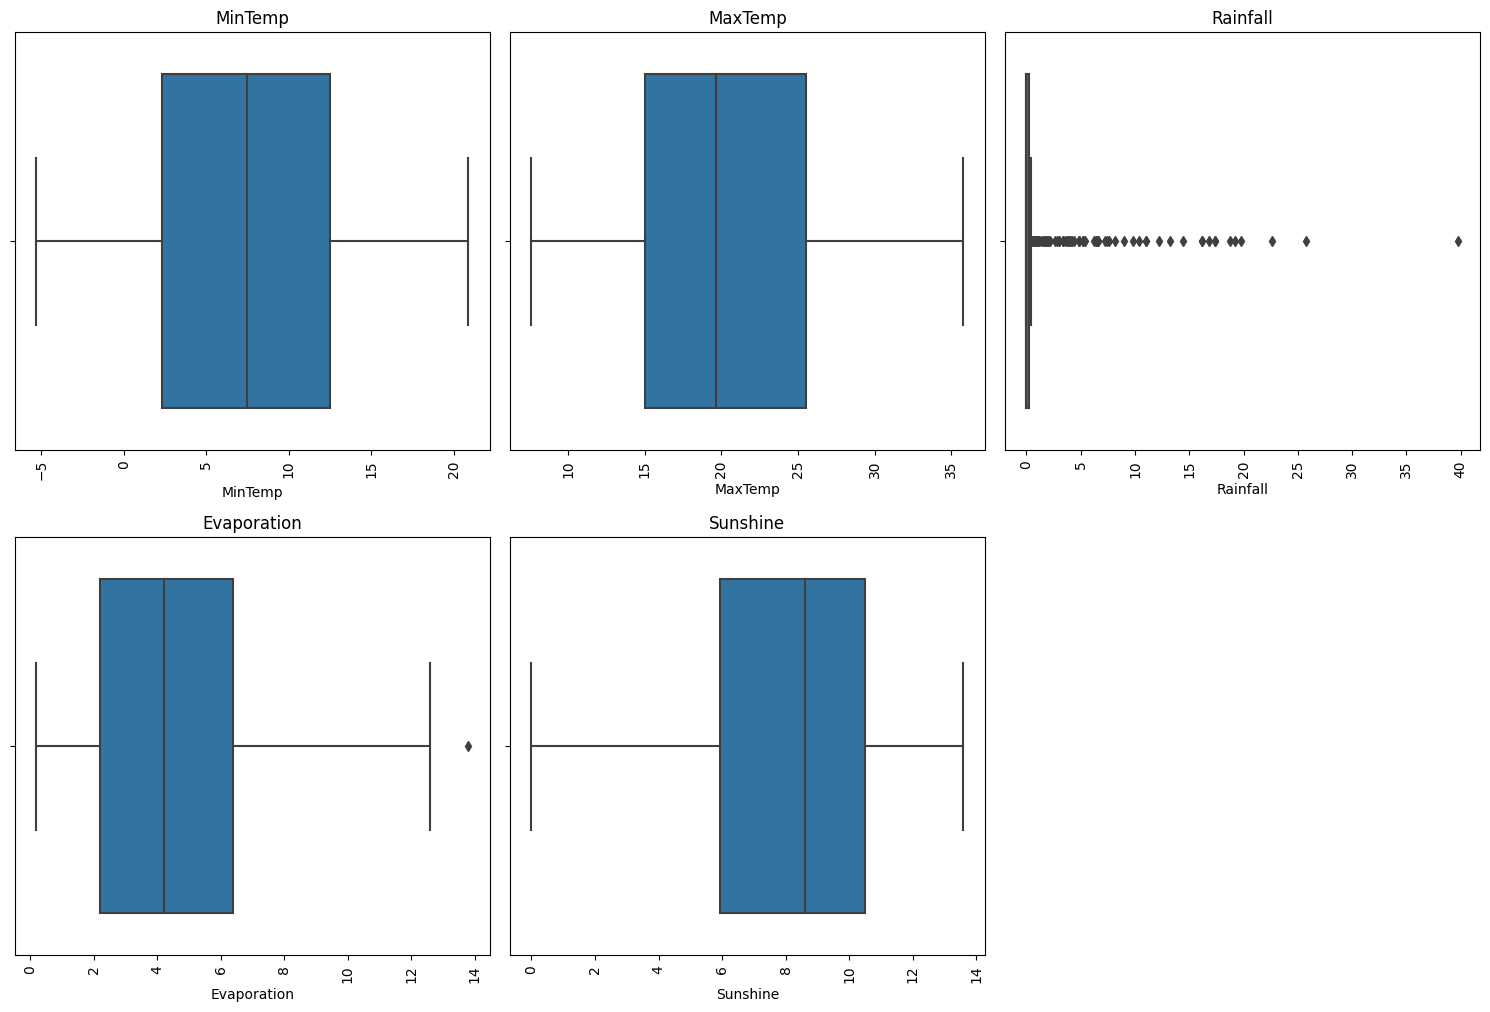

In [54]:
# Get names of all columns with data type 'object' ( cateforical columns)
num_vars = df.select_dtypes(include = ['int', 'float']).columns.tolist()

# Create a figure with subplots
num_cols = len(cat_vars)
num_rows = (num_cols + 2)
fig, axs = plt.subplots(nrows = num_rows, ncols = 3, figsize = (15, 5*num_rows))
axs = axs.flatten()

# Create a countplot for each categorical variable using Searborn
for i, var in enumerate(num_vars):
    sns.boxplot(x = df[var], ax = axs[i])
    axs[i].set_title(var)
    axs[i].tick_params(axis = 'x', rotation = 90)

# Remove any extra empty subplots if needed
if num_cols < len(axs):
    for i in range(num_cols, len(axs)):
        fig.delaxes(axs[i])

# Adjusting spacing between subplots
fig.tight_layout()        

# Show plot
plt.show()

In [ ]:
# Finding Correlation
plt.figure(figsize = (10, 6))
sns.heatmap(data = num1.corr(), annot = True)
plt.show()

In [ ]:
# Scatterplot of Rainfall vs all columns
for column in numerical_columns:
    plt.figure(figsize = (10, 6))
    sns.scatterplot(data = numerical_columns, x = numerical_columns[column], y = numerical_columns["Rainfall"])
    plt.xlabel(column, weight = "bold", fontsize = 12, labelpad = 10)
    plt.ylabel("Rainfall", weight = "bold", fontsize = 12, labelpad = 10)
    plt.xticks(weight = "bold")
    plt.yticks(weight = "bold")
    plt.show()

In [ ]:
# Distribution of Rainfall Column
plt.figure(figsize = (10, 6))
ax = sns.histplot(data = numerical_columns, x = numerical_columns["Rainfall"])
plt.title("Distribution of Rainfall Column")
plt.xlabel("Rainfall", weight = "bold", fontsize = 12, labelpad = 10)
plt.ylabel("Count", weight = "bold", fontsize = 12, labelpad = 10)
plt.xticks(weight = "bold")
plt.yticks(weight = "bold")

for i in ax.containers:
    i.datavalues
    ax.bar_label(i, weight = "bold")

plt.show()